In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

from src.simulator import simulate_trajectories

In [2]:
currents_ds = xr.open_dataset("data/currents_for_sim.nc")
wind_ds = xr.open_dataset("data/wind_for_sim.nc")
traj_ds = xr.open_dataset("data/traj_for_sim.nc")

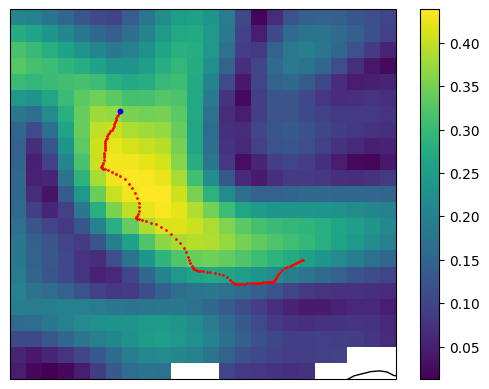

In [3]:
fig, ax = plt.subplots(1, 1, subplot_kw={"projection": ccrs.PlateCarree()})

im = ax.pcolormesh(
    currents_ds.longitude,
    currents_ds.latitude,
    (currents_ds.ucos.isel(time=0) ** 2 + currents_ds.vcos.isel(time=0) ** 2) ** 0.5,
    cmap="viridis",
)
fig.colorbar(im, ax=ax)

ax.scatter(
    traj_ds.lon, traj_ds.lat, c="red", s=1,
)
ax.scatter(
    traj_ds.lon[0], traj_ds.lat[0], c="blue", s=10,
)

ax.coastlines()

plt.show()

In [4]:
x0 = np.asarray([traj_ds["lon"][0].values, traj_ds["lat"][0].values])

In [19]:
sampled_params = np.vstack([
    np.random.uniform(0, 10, size=1000),
    np.random.uniform(45, 90, size=1000),
    np.random.uniform(0, 5 / 100, size=1000),
]).T

In [20]:
sim_trajectories = simulate_trajectories(
    currents_ds, wind_ds, x0, traj_ds["time"].values, sampled_params
)  # (N, T, 2)

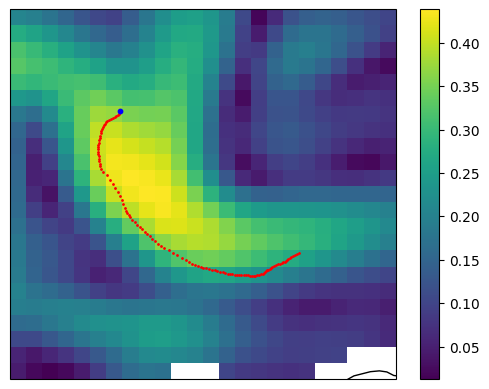

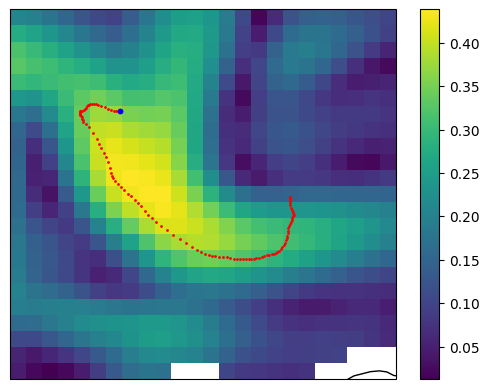

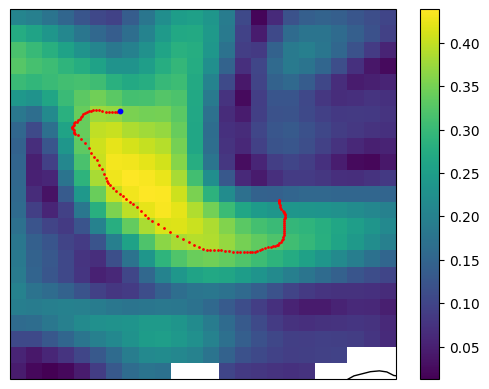

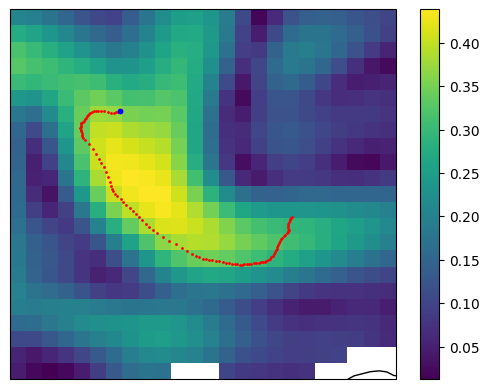

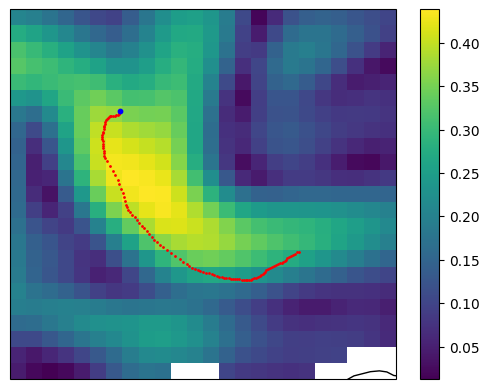

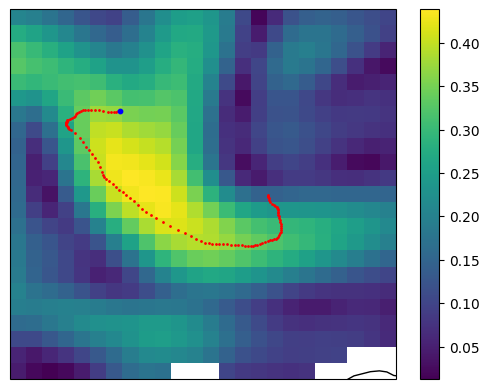

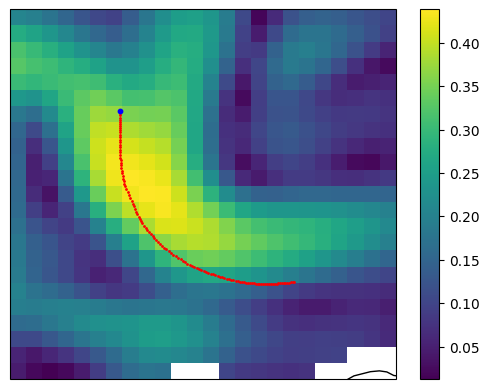

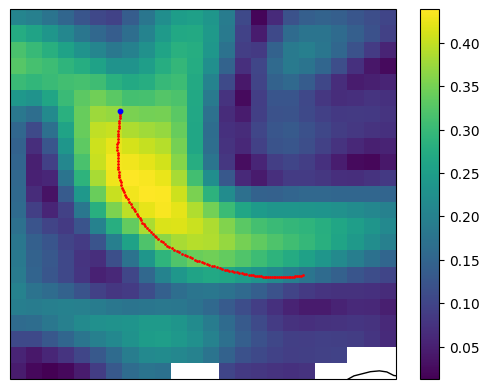

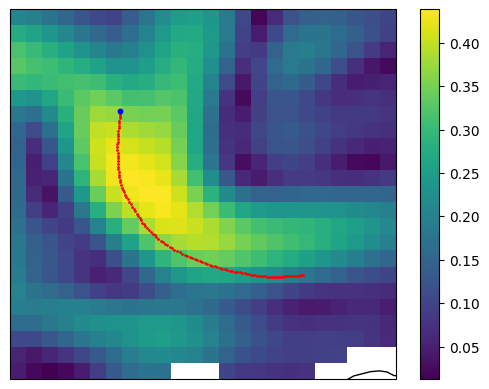

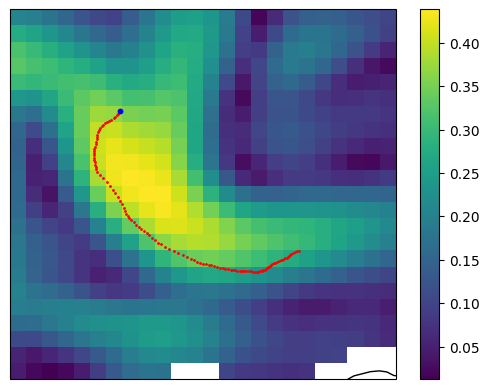

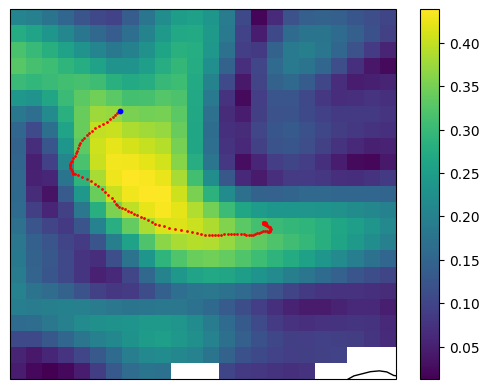

In [21]:
for i in range(sim_trajectories.shape[0]):
    fig, ax = plt.subplots(1, 1, subplot_kw={"projection": ccrs.PlateCarree()})

    im = ax.pcolormesh(
        currents_ds.longitude,
        currents_ds.latitude,
        (currents_ds.ucos.isel(time=0) ** 2 + currents_ds.vcos.isel(time=0) ** 2) ** 0.5,
        cmap="viridis",
    )
    fig.colorbar(im, ax=ax)

    ax.scatter(
        sim_trajectories[i, :, 0], sim_trajectories[i, :, 1], c="red", s=1,
    )
    ax.scatter(
        sim_trajectories[i, 0, 0], sim_trajectories[i, 0, 1], c="blue", s=10,
    )

    ax.coastlines()

    plt.show()

    if i >= 10:
        break